# W2M3 - 멀티프로세싱: 큐

### 학습목표
- FIFO 방식으로 항목을 올바르게 푸시하고 팝하는 스크립트를 작성하여 Python의 multiprocessing.Queue에 대한 이해를 보여주세요.

### 사전지식
### 기능요구사항
- 푸시 작업:
    - 프로그램은 대기열에 항목을 추가하기 시작하는 시점을 표시해야 합니다.
    - 프로그램은 주어진 목록의 각 색상을 대기열에 추가해야 합니다.
    - 프로그램은 대기열에 항목이 추가될 때 항목 번호와 항목 자체를 표시해야 합니다.

- 팝 오퍼레이션:
    - 프로그램은 대기열에서 항목을 제거하기 시작하는 시점을 표시해야 합니다.
    - 프로그램은 대기열이 비워질 때까지 항목을 하나씩 제거해야 합니다.
    - 프로그램은 대기열에서 항목이 제거될 때 항목 번호와 항목 자체를 표시해야 합니다.

### 프로그래밍관점
- Python의 multiprocessing 모듈을 사용하세요.
- 대기열에 푸시할 항목 목록을 정의합니다.
- Queue 클래스를 사용하여 큐를 생성합니다.
- 목록에서 항목을 대기열로 밀어넣습니다.
- 대기열이 비워질 때까지 대기열에서 항목을 팝합니다.
- 각 푸시 및 팝 작업에 대한 항목 번호와 항목을 인쇄합니다.

### 시청결과 및 동작예시
큐에 항목 푸시:  
항목 번호: 1 빨간색  
항목 번호: 2 녹색  
항목 번호: 3 파란색  
항목 번호: 4 검정색  
  
대기열에서 항목 팝:  
항목 번호: 0 빨간색  
항목 번호: 1 녹색  
항목 번호: 2 파란색  
항목 번호: 3 검정색

---

In [ ]:
from multiprocessing import Process, Queue
import time


def push_to_queue(queue, items):
    print("pushing items to queue")
    for index, item in enumerate(items, start=1):
        queue.put((index, item))
        print(f"item no: {index} {item}")
        time.sleep(0.3)
    
def pop_from_queue(queue):
    print("popping items from queue:")
    item_number = 0
    while not queue.empty():
        item_number, item = queue.get()
        print(f"item no: {item_number} {item}")
        time.sleep(0.3)



if __name__ == "__main__":
    colors = ["Red", "Green", "Blue", "Black"]
    
    queue = Queue()
    
    producer = Process(target=push_to_queue, args=(queue, colors))
    consumer = Process(target=pop_from_queue, args=(queue,))
    
    producer.start()
    producer.join()
    
    consumer.start()
    consumer.join()
    

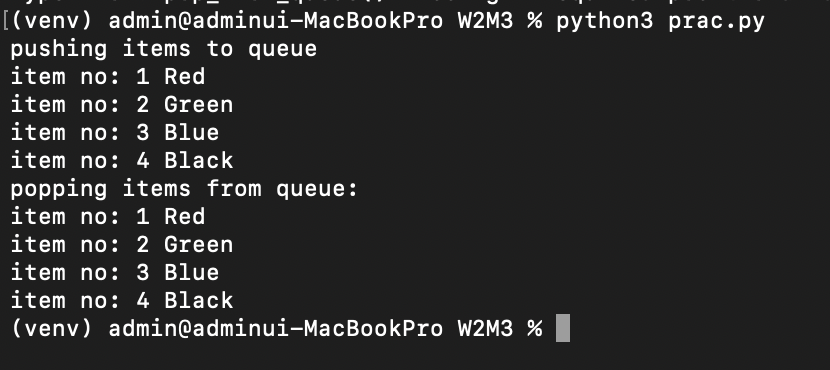